# **Wine**

In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
from skin_tlearn.model_selection import traest_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

In [ ]:
wine_data = load_wine() 
wine = pd.DataFrame(wine_data.data)
print ("Features Name : ", wine_data.feature_names) 
print ("Dataset Shape: ", wine.shape) 
print ("Dataset: ",wine.head())

Features Name :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Dataset Shape:  (178, 13)
Dataset:        0     1     2     3      4     5   ...    7     8     9     10    11      12
0  14.23  1.71  2.43  15.6  127.0  2.80  ...  0.28  2.29  5.64  1.04  3.92  1065.0
1  13.20  1.78  2.14  11.2  100.0  2.65  ...  0.26  1.28  4.38  1.05  3.40  1050.0
2  13.16  2.36  2.67  18.6  101.0  2.80  ...  0.30  2.81  5.68  1.03  3.17  1185.0
3  14.37  1.95  2.50  16.8  113.0  3.85  ...  0.24  2.18  7.80  0.86  3.45  1480.0
4  13.24  2.59  2.87  21.0  118.0  2.80  ...  0.39  1.82  4.32  1.04  2.93   735.0

[5 rows x 13 columns]


## **Testing 20%**

In [ ]:
X = wine.values[:, 0:13] 
Y = wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
clf = DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X = [wine.values[1,0:13]]
Y_pred = clf.predict(X)
print(Y_pred)
Y_pred = clf.predict(X_test)
print(Y_pred)

[0]
[1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[14  0  0]
 [ 2 15  2]
 [ 1  4 16]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.8333333333333334


[Text(418.5, 733.86, 'X[12] <= 755.0\ngini = 0.655\nsamples = 142\nvalue = [51, 56, 35]'),
 Text(209.25, 570.78, 'X[6] <= 1.29\ngini = 0.484\nsamples = 86\nvalue = [2, 54, 30]'),
 Text(104.625, 407.70000000000005, 'X[10] <= 1.005\ngini = 0.165\nsamples = 33\nvalue = [0, 3, 30]'),
 Text(52.3125, 244.62, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(156.9375, 244.62, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(313.875, 407.70000000000005, 'X[0] <= 13.175\ngini = 0.073\nsamples = 53\nvalue = [2, 51, 0]'),
 Text(261.5625, 244.62, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(366.1875, 244.62, 'X[1] <= 2.125\ngini = 0.444\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(313.875, 81.54000000000008, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(418.5, 81.54000000000008, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(627.75, 570.78, 'X[6] <= 1.605\ngini = 0.225\nsamples = 56\nvalue = [49, 2, 5]'),
 Text(523.125, 407.70000000000005, 'X[6] <= 0.9\ngini = 0.278\nsa

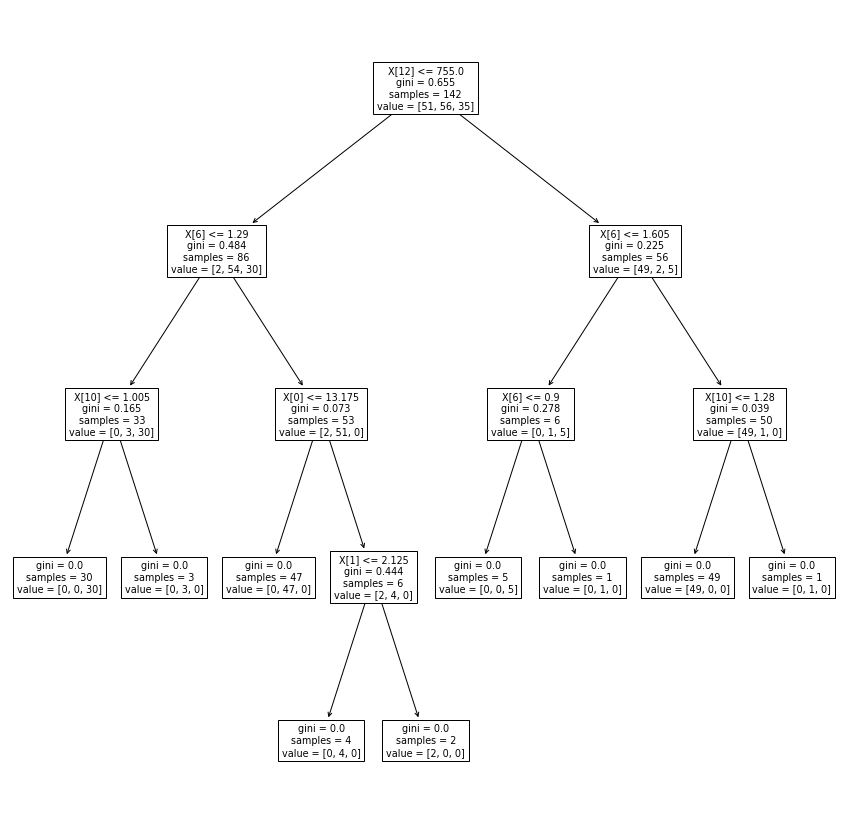

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_12 <= 755.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- feature_10 <= 1.28
|   |   |   |--- class: 0
|   |   |--- feature_10 >  1.28
|   |   |   |--- class: 1



## **Testing 30%**

In [ ]:
X = wine.values[:, 0:13] 
Y = wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
clf = DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[wine.values[1,0:13]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[14  0  0]
 [ 2 15  2]
 [ 1  4 16]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.8333333333333334


[Text(418.5, 733.86, 'X[12] <= 755.0\ngini = 0.645\nsamples = 124\nvalue = [45, 52, 27]'),
 Text(209.25, 570.78, 'X[6] <= 1.275\ngini = 0.454\nsamples = 74\nvalue = [2, 50, 22]'),
 Text(104.625, 407.70000000000005, 'X[10] <= 1.005\ngini = 0.153\nsamples = 24\nvalue = [0, 2, 22]'),
 Text(52.3125, 244.62, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 22]'),
 Text(156.9375, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(313.875, 407.70000000000005, 'X[0] <= 13.175\ngini = 0.077\nsamples = 50\nvalue = [2, 48, 0]'),
 Text(261.5625, 244.62, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(366.1875, 244.62, 'X[1] <= 2.125\ngini = 0.444\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(313.875, 81.54000000000008, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(418.5, 81.54000000000008, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(627.75, 570.78, 'X[6] <= 1.605\ngini = 0.249\nsamples = 50\nvalue = [43, 2, 5]'),
 Text(523.125, 407.70000000000005, 'X[6] <= 0.9\ngini = 0.278\ns

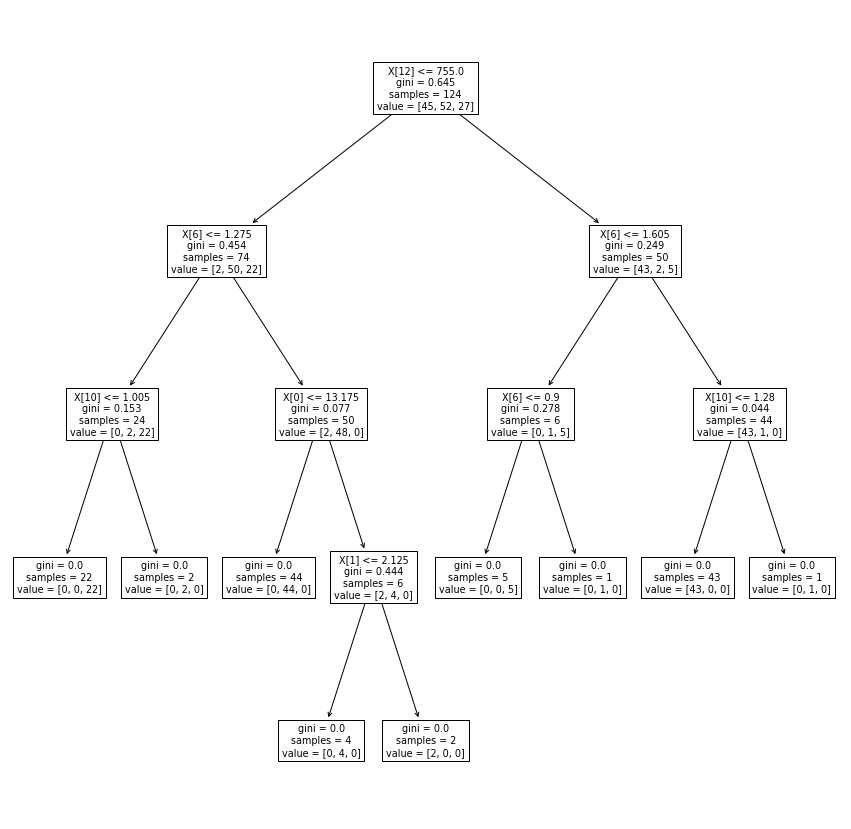

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_12 <= 755.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- feature_10 <= 1.28
|   |   |   |--- class: 0
|   |   |--- feature_10 >  1.28
|   |   |   |--- class: 1



## **Testing 40 %**

In [ ]:
X = wine.values[:, 0:13] 
Y = wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100)
clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[wine.values[1,0:13]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1 2 2 0 0 1 1 0 2 0 1 1 2 1 0 0 1 0 0]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[21  0  0]
 [ 3 21  2]
 [ 1  4 20]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.8611111111111112


[Text(482.8846153846154, 733.86, 'X[12] <= 760.0\ngini = 0.644\nsamples = 106\nvalue = [38, 45, 23]'),
 Text(257.53846153846155, 570.78, 'X[6] <= 1.275\ngini = 0.447\nsamples = 64\nvalue = [2, 44, 18]'),
 Text(128.76923076923077, 407.70000000000005, 'X[10] <= 1.005\ngini = 0.18\nsamples = 20\nvalue = [0, 2, 18]'),
 Text(64.38461538461539, 244.62, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]'),
 Text(193.15384615384616, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(386.3076923076923, 407.70000000000005, 'X[0] <= 13.175\ngini = 0.087\nsamples = 44\nvalue = [2, 42, 0]'),
 Text(321.9230769230769, 244.62, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(450.69230769230774, 244.62, 'X[1] <= 2.125\ngini = 0.444\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(386.3076923076923, 81.54000000000008, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(515.0769230769231, 81.54000000000008, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(708.2307692307693, 570.78, 'X[6] <= 1.605

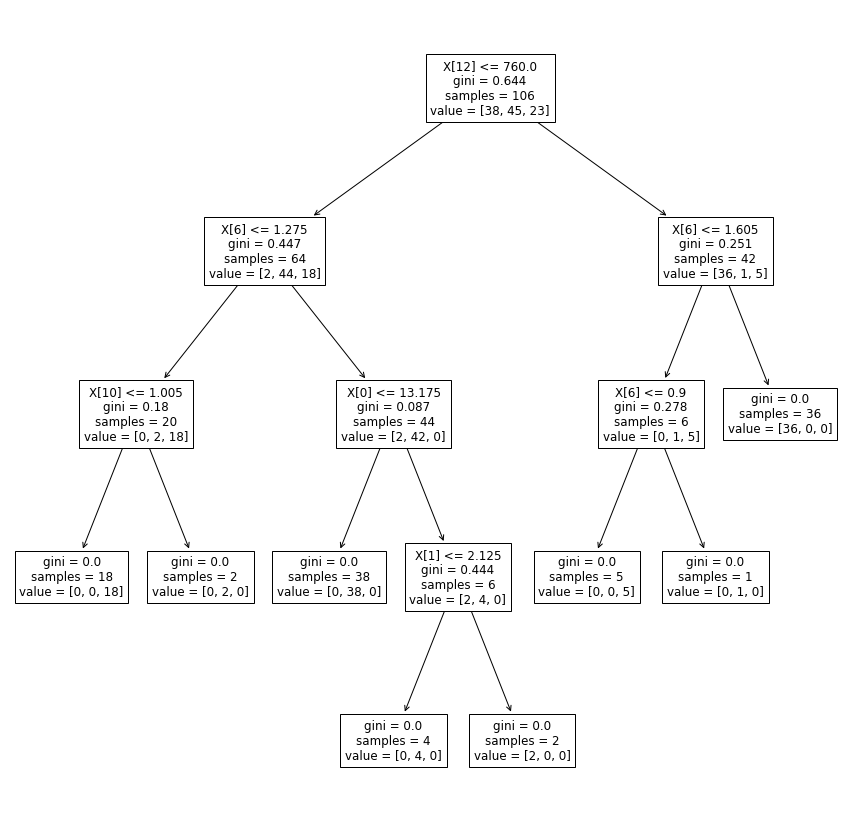

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_12 <= 755.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- feature_10 <= 1.28
|   |   |   |--- class: 0
|   |   |--- feature_10 >  1.28
|   |   |   |--- class: 1



# **Pima Indian Diabetes**

In [ ]:
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Testing 20 %**

In [ ]:
X = diabetes_data.values[:, 0:8] 
Y = diabetes_data[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[diabetes_data.values[1,0:8]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 1]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[83 18]
 [27 26]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.7077922077922078


[Text(371.9012439320388, 784.0384615384615, 'X[1] <= 123.5\ngini = 0.455\nsamples = 614\nvalue = [399, 215]'),
 Text(155.6677791262136, 721.3153846153846, 'X[7] <= 28.5\ngini = 0.276\nsamples = 357\nvalue = [298, 59]'),
 Text(44.69417475728155, 658.5923076923077, 'X[0] <= 7.5\ngini = 0.103\nsamples = 201\nvalue = [190, 11]'),
 Text(36.567961165048544, 595.8692307692307, 'X[5] <= 30.95\ngini = 0.095\nsamples = 200\nvalue = [190, 10]'),
 Text(28.441747572815533, 533.1461538461538, 'gini = 0.0\nsamples = 117\nvalue = [117, 0]'),
 Text(44.69417475728155, 533.1461538461538, 'X[2] <= 22.0\ngini = 0.212\nsamples = 83\nvalue = [73, 10]'),
 Text(36.567961165048544, 470.4230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(52.82038834951456, 470.4230769230769, 'X[5] <= 31.1\ngini = 0.195\nsamples = 82\nvalue = [73, 9]'),
 Text(44.69417475728155, 407.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(60.946601941747566, 407.7, 'X[4] <= 9.0\ngini = 0.178\nsamples = 81\nvalue = [73, 8]

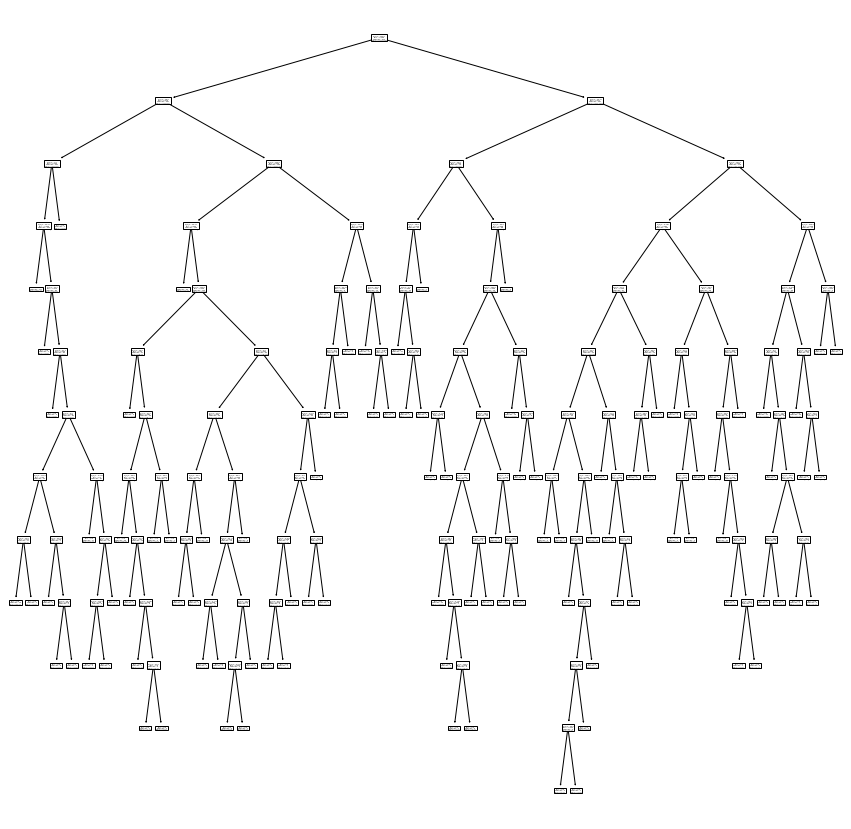

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 123.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |--- feature_5 <= 31.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  31.10
|   |   |   |   |   |   |--- feature_4 <= 9.00
|   |   |   |   |   |   |   |--- feature_1 <= 111.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 40.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  40.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  111.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 34.65
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  34.65
|   |   |   |   |   |   |   |   |   |--- featur

## **Testing 30%**

In [ ]:
X = diabetes_data.values[:, 0:8] 
Y = diabetes_data[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[diabetes_data.values[1,0:8]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 1 0]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[115  35]
 [ 38  43]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.683982683982684


[Text(416.8222142269737, 791.4176470588235, 'X[1] <= 123.5\ngini = 0.454\nsamples = 537\nvalue = [350, 187]'),
 Text(125.27467105263159, 743.4529411764706, 'X[7] <= 28.5\ngini = 0.272\nsamples = 314\nvalue = [263, 51]'),
 Text(44.05263157894737, 695.4882352941177, 'X[5] <= 49.1\ngini = 0.096\nsamples = 178\nvalue = [169, 9]'),
 Text(33.03947368421053, 647.5235294117647, 'X[0] <= 7.5\ngini = 0.086\nsamples = 177\nvalue = [169, 8]'),
 Text(22.026315789473685, 599.5588235294117, 'X[5] <= 30.95\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(11.013157894736842, 551.5941176470587, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(33.03947368421053, 551.5941176470587, 'X[2] <= 22.0\ngini = 0.18\nsamples = 70\nvalue = [63, 7]'),
 Text(22.026315789473685, 503.6294117647059, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(44.05263157894737, 503.6294117647059, 'X[5] <= 31.1\ngini = 0.159\nsamples = 69\nvalue = [63, 6]'),
 Text(33.03947368421053, 455.66470588235296, 'gini = 0.0\nsam

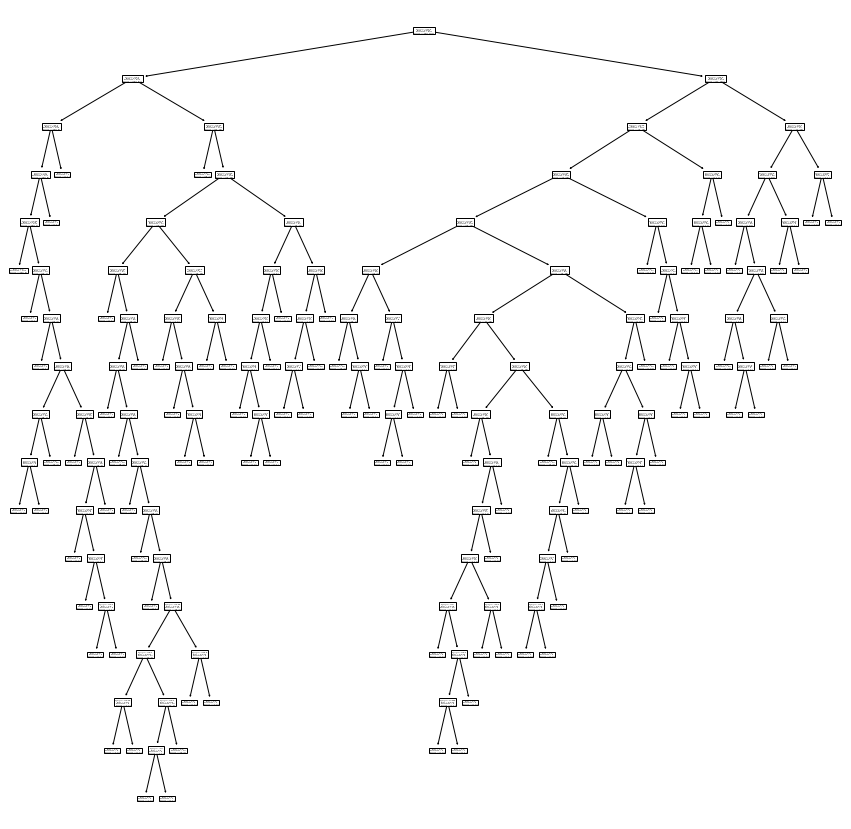

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 123.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 49.10
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- feature_5 <= 30.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  30.95
|   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |--- feature_5 <= 31.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  31.10
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 31.80
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  31.80
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   

## **Testing 40%**

In [ ]:
X = diabetes_data.values[:, 0:8] 
Y = diabetes_data[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100)
clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[diabetes_data.values[1,0:8]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[149  47]
 [ 39  73]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.7207792207792207


[Text(425.4883110687023, 784.0384615384615, 'X[1] <= 127.5\ngini = 0.448\nsamples = 460\nvalue = [304, 156]'),
 Text(204.05868320610688, 721.3153846153846, 'X[7] <= 32.5\ngini = 0.29\nsamples = 295\nvalue = [243, 52]'),
 Text(89.45038167938931, 658.5923076923077, 'X[0] <= 6.5\ngini = 0.153\nsamples = 204\nvalue = [187, 17]'),
 Text(51.11450381679389, 595.8692307692307, 'X[5] <= 30.95\ngini = 0.116\nsamples = 195\nvalue = [183, 12]'),
 Text(38.33587786259542, 533.1461538461538, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(63.89312977099237, 533.1461538461538, 'X[6] <= 0.501\ngini = 0.245\nsamples = 84\nvalue = [72, 12]'),
 Text(25.557251908396946, 470.4230769230769, 'X[2] <= 22.0\ngini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(12.778625954198473, 407.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(38.33587786259542, 407.7, 'X[5] <= 31.3\ngini = 0.069\nsamples = 56\nvalue = [54, 2]'),
 Text(25.557251908396946, 344.9769230769231, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'

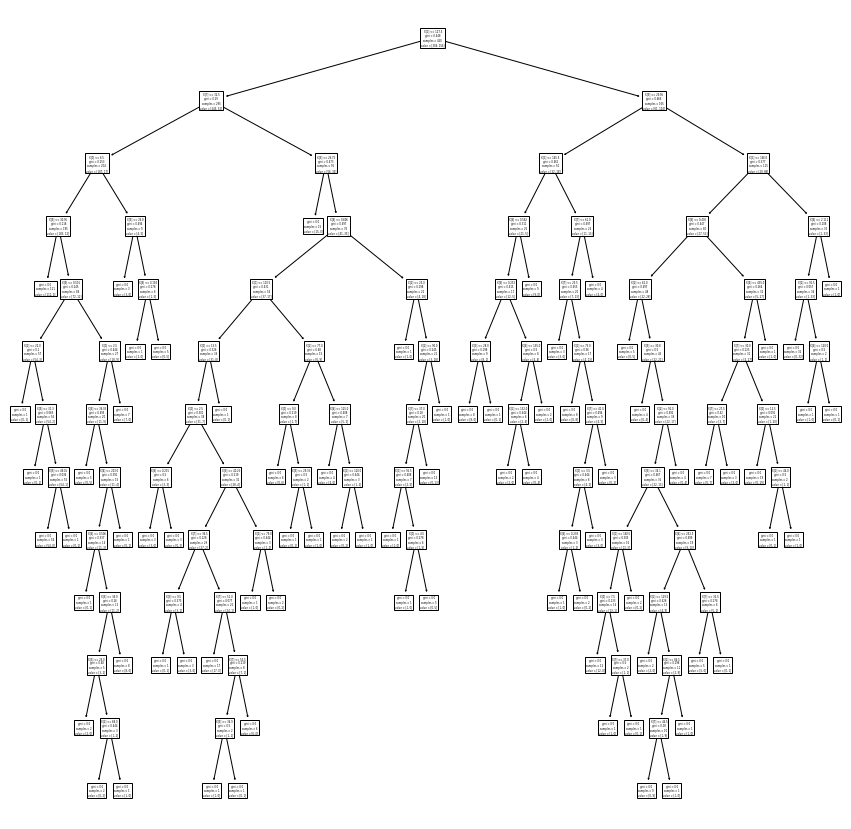

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 32.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |--- feature_5 <= 31.30
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  31.30
|   |   |   |   |   |   |   |--- feature_5 <= 49.05
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  49.05
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- feature_5 <= 34.05
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  34.05
|   |   |   |   |   |   |   |--- feature_4 <= 203.00
|   |   |   |   |   |   |   |   |--- featu

# **Breast Cancer**

In [ ]:
cancer_data = load_breast_cancer() 
cancer = pd.DataFrame(cancer_data.data)
print ("Features Name : ", cancer_data.feature_names) 
print ("Dataset Shape: ", cancer.shape) 
print ("Dataset: ",cancer.head())

Features Name :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Dataset Shape:  (569, 30)
Dataset:        0      1       2       3   ...      26      27      28       29
0  17.99  10.38  122.80  1001.0  ...  0.7119  0.2654  0.4601  0.11890
1  20.57  17.77  132.90  1326.0  ...  0.2416  0.1860  0.2750  0.08902
2  19.69  21.25  130.00  1203.0  ...  0.4504  0.2430  0.3613  0.08758
3  11.42  20.38   77.58   386.1  ...  0.6869  0.2575  0.6638  0.17300
4  20.29  14.34  135.10  1297.0  ...  0.40

## **Testing 20%**

In [ ]:
X = cancer.values[:, 0:30] 
Y = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[cancer.values[1,0:30]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[45  4]
 [ 2 63]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.9473684210526315


[Text(613.6658653846154, 757.1571428571428, 'X[27] <= 0.147\ngini = 0.46\nsamples = 455\nvalue = [163, 292]'),
 Text(486.90865384615387, 640.6714285714286, 'X[23] <= 957.45\ngini = 0.176\nsamples = 317\nvalue = [31, 286]'),
 Text(329.97115384615387, 524.1857142857143, 'X[27] <= 0.132\ngini = 0.095\nsamples = 299\nvalue = [15, 284]'),
 Text(177.05769230769232, 407.7, 'X[13] <= 36.465\ngini = 0.049\nsamples = 277\nvalue = [7, 270]'),
 Text(64.38461538461539, 291.21428571428567, 'X[21] <= 33.27\ngini = 0.008\nsamples = 259\nvalue = [1, 258]'),
 Text(32.19230769230769, 174.7285714285714, 'gini = 0.0\nsamples = 242\nvalue = [0, 242]'),
 Text(96.57692307692308, 174.7285714285714, 'X[21] <= 33.8\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(64.38461538461539, 58.24285714285713, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(128.76923076923077, 58.24285714285713, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(289.7307692307692, 291.21428571428567, 'X[1] <= 21.435\ngini = 0.444\

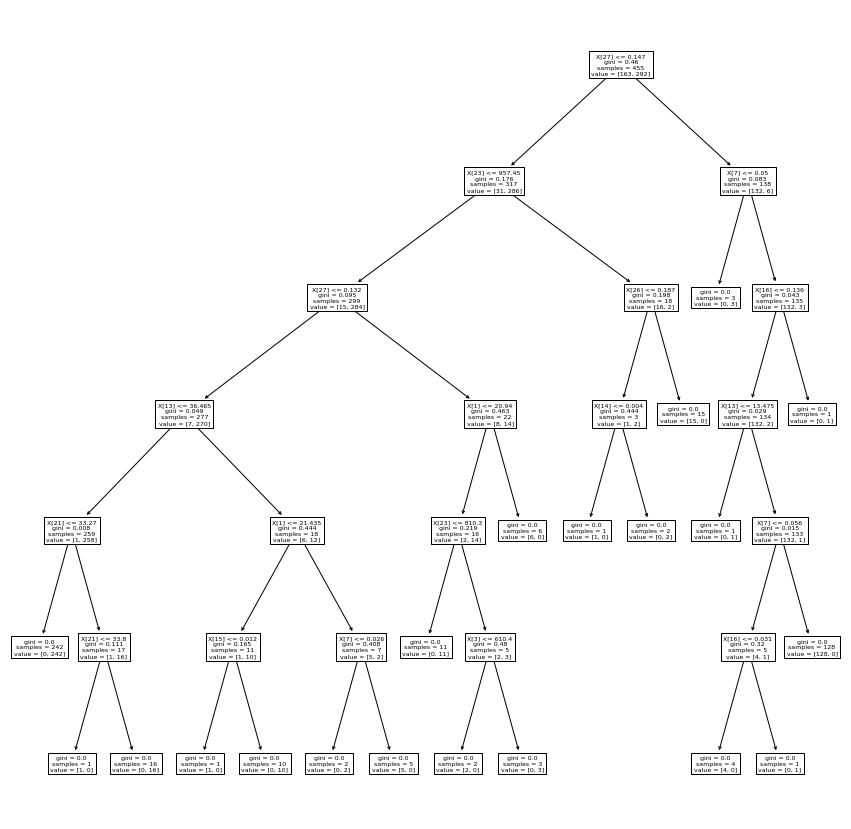

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_27 <= 0.15
|   |--- feature_23 <= 957.45
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_13 <= 36.47
|   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  36.47
|   |   |   |   |--- feature_1 <= 21.43
|   |   |   |   |   |--- feature_15 <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_15 >  0.01
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  21.43
|   |   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_1 <= 20.94
|   |   |   |   |--- feature_23 <= 810.30
|   |   |   |   |   |--- class: 1
|   |   

## **Testing 30%**

In [ ]:
X = cancer.values[:, 0:30] 
Y = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[cancer.values[1,0:30]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[64  5]
 [ 3 99]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.9532163742690059


[Text(506.38499999999993, 764.4375, 'X[27] <= 0.144\ngini = 0.46\nsamples = 398\nvalue = [143, 255]'),
 Text(343.16999999999996, 662.5125, 'X[3] <= 696.25\ngini = 0.155\nsamples = 271\nvalue = [23, 248]'),
 Text(217.61999999999998, 560.5875, 'X[27] <= 0.122\ngini = 0.055\nsamples = 249\nvalue = [7, 242]'),
 Text(133.92, 458.66249999999997, 'X[10] <= 0.626\ngini = 0.017\nsamples = 228\nvalue = [2, 226]'),
 Text(66.96, 356.7375, 'X[21] <= 33.35\ngini = 0.009\nsamples = 224\nvalue = [1, 223]'),
 Text(33.48, 254.8125, 'gini = 0.0\nsamples = 209\nvalue = [0, 209]'),
 Text(100.44, 254.8125, 'X[21] <= 33.8\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(66.96, 152.88750000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92, 152.88750000000005, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(200.88, 356.7375, 'X[15] <= 0.014\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(167.39999999999998, 254.8125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(234.359999999999

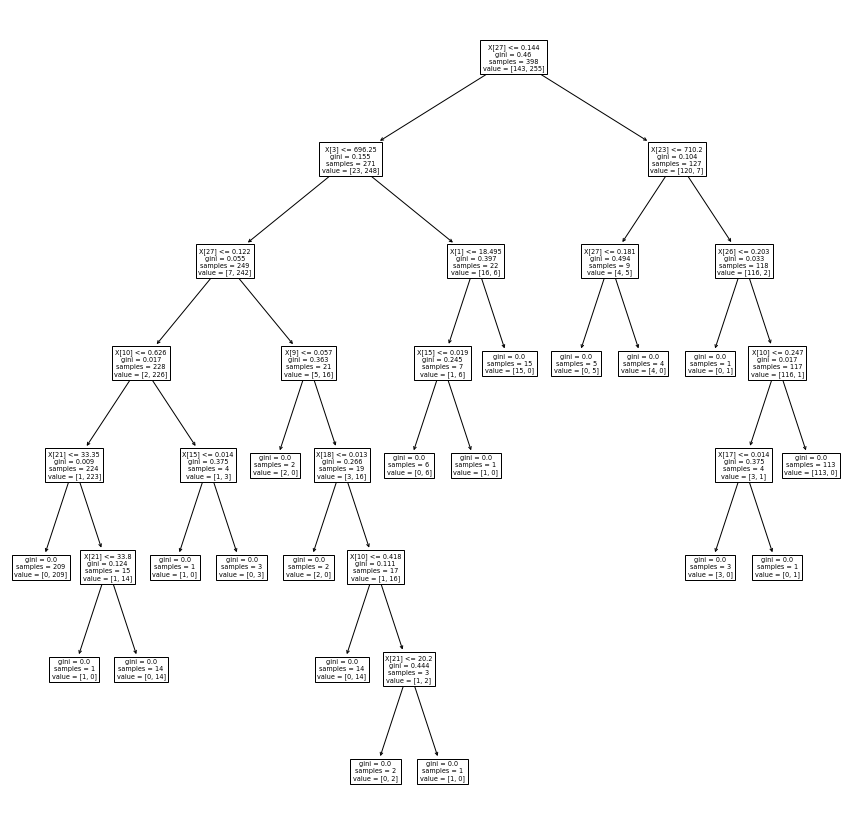

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_27 <= 0.14
|   |--- feature_3 <= 696.25
|   |   |--- feature_27 <= 0.12
|   |   |   |--- feature_10 <= 0.63
|   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  0.63
|   |   |   |   |--- feature_15 <= 0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  0.01
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.12
|   |   |   |--- feature_9 <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  0.06
|   |   |   |   |--- feature_18 <= 0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_18 >  0.01
|   |   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |   |--- feature_21 <

## **Testing 40%**

In [ ]:
X = cancer.values[:, 0:30] 
Y = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100)
clf= DecisionTreeClassifier(random_state = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
X=[cancer.values[1,0:30]]
Y_pred=clf.predict(X)
print(Y_pred)
Y_pred=clf.predict(X_test)
print(Y_pred)

[0]
[0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 0]


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 77  10]
 [  8 133]]


In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.9210526315789473


[Text(449.8875, 747.4499999999999, 'X[27] <= 0.144\ngini = 0.464\nsamples = 341\nvalue = [125, 216]'),
 Text(272.02500000000003, 611.55, 'X[13] <= 36.465\ngini = 0.153\nsamples = 228\nvalue = [19, 209]'),
 Text(167.4, 475.65, 'X[27] <= 0.131\ngini = 0.039\nsamples = 203\nvalue = [4, 199]'),
 Text(83.7, 339.74999999999994, 'X[21] <= 33.105\ngini = 0.01\nsamples = 193\nvalue = [1, 192]'),
 Text(41.85, 203.8499999999999, 'gini = 0.0\nsamples = 181\nvalue = [0, 181]'),
 Text(125.55000000000001, 203.8499999999999, 'X[21] <= 33.8\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(83.7, 67.94999999999993, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 67.94999999999993, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(251.10000000000002, 339.74999999999994, 'X[18] <= 0.013\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(209.25, 203.8499999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(292.95, 203.8499999999999, 'X[9] <= 0.057\ngini = 0.219\nsamples = 8\nvalue = 

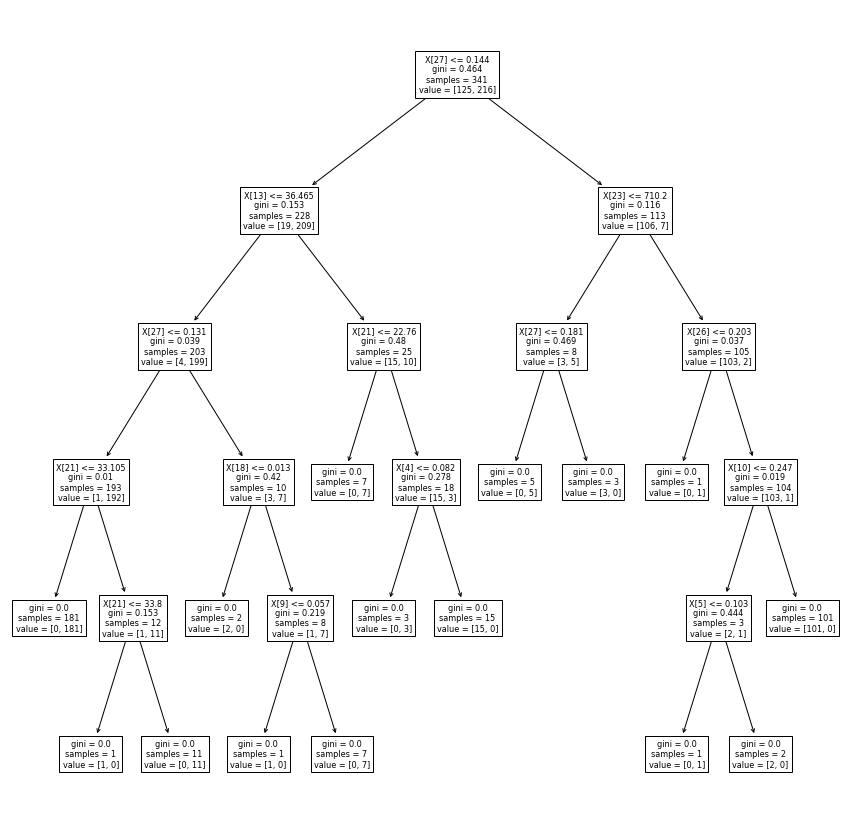

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_27 <= 0.14
|   |--- feature_13 <= 36.47
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  33.10
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_18 <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.01
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: 1
|   |--- feature_13 >  36.47
|   |   |--- feature_21 <= 22.76
|   |   |   |--- class: 1
|   |   |--- feature_21 >  22.76
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- class: 0
|--- feature_27 >  0.14
|   |--- feature_23 <= 710.20
|   |   |--- feature_27 <= 0.18
|   |   |   |--- class: 1
|   |   |--- featu